# Análise da qualidade de Dados



O naufrágio do Titanic é um dos naufrágios mais conhecido da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o navio amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvessem alguns elementos em que a sorte fez parte na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

## Desenvolvendo a proposta

Utilizar o aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.


### Análise baseada na aula do Prof° Vinícius Santos no Curso de Business IA do I2A2-Canadá

In [32]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### Baixando o dataset


In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/fernandozoomp/Sobreviventes_Titanic_ML/master/train.csv'
filename = 'train.csv'
urllib.request.urlretrieve(url, filename)

('train.csv', <http.client.HTTPMessage at 0x257d9bc33a0>)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [35]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape


(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exibindo informações sobre a amostra

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
df.loc[206]

PassengerId                           207
Survived                                0
Pclass                                  3
Name           Backstrom, Mr. Karl Alfred
Sex                                  male
Age                                    32
SibSp                                   1
Parch                                   0
Ticket                            3101278
Fare                                15.85
Cabin                                 NaN
Embarked                                S
Name: 206, dtype: object

In [9]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [11]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

### Verificando os valores inconsistentes

In [14]:
# Verificação da quantidade de valores nulos para a coluna Age
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.Age.isna().sum()

177

In [15]:
sum(df.duplicated())

0

In [16]:
df.columns[df.isnull().any()].values

array(['Age', 'Cabin', 'Embarked'], dtype=object)

### Tamanho da amostra

In [17]:
len(df)

891

### Limpeza dos dados inconsistentes

In [40]:
# Tratamento do campo Age
df.Age = df.Age.fillna(df['Age'].mean()).astype('int64')

# Verifica o resultado
df.Age.unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [45]:
#removendo a coluna Cabin que consta muitos valores ausentes
df = df.drop('Cabin', axis=1)
df = df.dropna()

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [48]:
e_age = df['Age'].isnull().sum()

In [49]:
def normalAge (age):
    if age < 1.0:
        return 1.0
    return age

df['Age'] = df['Age'].apply(normalAge)

In [50]:
df['Age'].describe()

count    889.000000
mean      29.506187
std       12.962012
min        1.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Normalizando a idade média por sexo e classe

In [51]:
age_man = df[df['Sex'] == 'male'].groupby('Pclass')['Age'].mean()
age_woman = df[df['Sex'] == 'female'].groupby('Pclass')['Age'].mean()

age_man
age_woman

Pclass
1    33.728261
2    28.723684
3    23.861111
Name: Age, dtype: float64

In [52]:
df['Age'] = df['Age'].groupby([df['Sex'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))

In [53]:
df['Age'].isnull().sum()

0

In [89]:
df['Age']= df['Age'].astype(int)

Criação da coluna faixa_etária para classificar por idade entre os seguintes inteválos:

                                De 0 a 14 = Criança
                                De 15 a 50 = Adulto
                                De 51 a 150 = Idoso 

In [63]:
# Criação das variáveis para o invervalo e sua respectiva categoria

intervalos = [0, 14, 50, 150]
descricao = ["criancas", "adultos", "idosos"]

# Utilização da função cut do pandas para categorizar cada idade em sua faixa etária

df["faixa_etaria"] = pd.cut(x = df.Age
                                    ,bins = intervalos
                                    ,labels = descricao
                                   )

# Ajuste na coluna Sexo

Sex = {'male': 'M','female': 'F'}
df.Sex = [Sex[item] for item in df.Sex]

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",M,22,1,0,A/5 21171,7.2500,S,adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38,1,0,PC 17599,71.2833,C,adultos
2,3,1,3,"Heikkinen, Miss. Laina",F,26,0,0,STON/O2. 3101282,7.9250,S,adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35,1,0,113803,53.1000,S,adultos
4,5,0,3,"Allen, Mr. William Henry",M,35,0,0,373450,8.0500,S,adultos


# Análise Geral



## Total de sobreviventes e mortos

Total de Sobreviventes: 340
Total de Mortos: 549


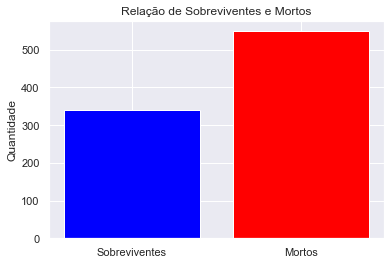

Text(0, 0.5, '')

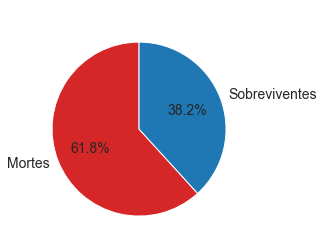

In [74]:
qt_sobreviventes = df.query('Survived == "1"')['Survived'].shape[0]
qt_mortos = df.query('Survived == "0"')['Survived'].shape[0]
label = ['Sobreviventes', 'Mortos']


print("Total de Sobreviventes: " + str(qt_sobreviventes)
      + '\n'
      + "Total de Mortos: " + str(qt_mortos))

tamanho = np.arange(2)


# Criação do plot para melhor visualização dos dados

BarMortos = plt.bar(1
                    ,qt_mortos
                    ,color='red'
                    ,label='Mortos'
                   )

BarSobreviventes = plt.bar(0
                           ,qt_sobreviventes
                           ,color='blue'
                           ,label='sobreviventes'
                          )

plt.ylabel('Quantidade')
plt.title('Relação de Sobreviventes e Mortos')
plt.xticks(tamanho, label)
plt.show();


df['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), title=' ', fontsize=14, shadow=False, startangle=90, autopct='%1.1f%%', labels=('Mortes', 'Sobreviventes'), figsize=(6,4)).set_ylabel('')

## Faixa etária com maior sobrevivência

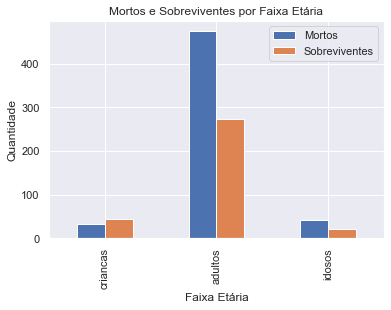

In [80]:
# Agrupa pelos campos (faixa_etaria e sobrevivente) e retorna um gráfico de barra.

df.groupby(["faixa_etaria","Survived"])["faixa_etaria"].size().unstack().plot.bar()
plt.title("Mortos e Sobreviventes por Faixa Etária")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show();

<AxesSubplot:ylabel='Frequency'>

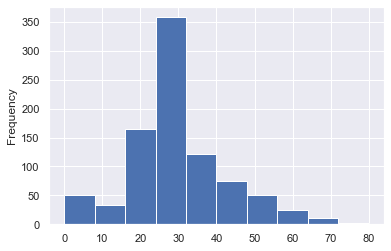

In [82]:
# Analisando a faixa de idade 

filtered_df.Age.plot(kind='hist')

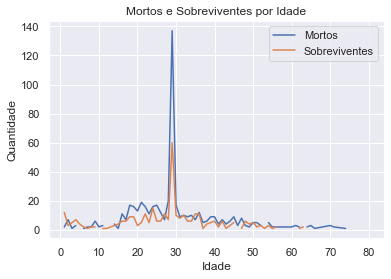

In [87]:
# Gráfico complementar com informações por idade

df.groupby(["Age","Survived"])["Age"].size().unstack().plot.line()
plt.title("Mortos e Sobreviventes por Idade")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show();

No gráfico acima, é possível observar que o índice de sobrevivência da idade de 30 anos é menor relacionado ao índice de mortes nessa mesma idade.

## Mortos e sobreviventes por classe

In [92]:
# Retorna o quantidade pela coluna Classe_Bilhete

df.groupby(["Pclass","Survived"])["Pclass"].count().unstack()

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


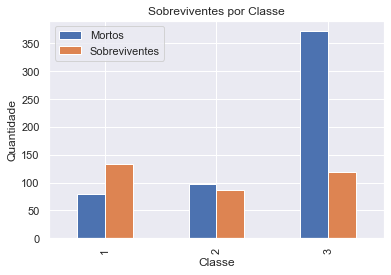

In [94]:
# Retorna o gráfico de barra as informações entre os sobreviventes da primeira, segunda e terceira classe.

df.groupby(["Pclass","Survived"])["Pclass"].size().unstack().plot.bar()
plt.title("Sobreviventes por Classe")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show();

Seguem algumas observações em relação ao gráfico acima:

1- Na primeira classe, a quantidade de sobreviventes é maior que a quantidade de mortos de sua própria classe e também das demais.
Na primeira classe, a quantidade de mortos é menor que qualquer outra classe;

2- Na segunda classe, a quantidade de mortos supera a da primeira, porém a de sobreviventes fica abaixo não só dela mesma em comparação aos mortos quanto das demais;

3- E por fim, para a terceira classe, o total de mortos supera em muito a quantidade das classes já mensionadas. Isso leva a refletir sobre serem eles os primeiros a sentirem o impacto da colisão.

## Finalizando

O arquivo utilizado contém 891 registros, no qual dentre ele há informações relevantes sobre os sobreviventes e os que morreram. Estes questionamentos foram analisados utilizando métodos de visualização mais claras, para que a compreensão do que aconteceu fosse mais simples

Seguem algumas observações referentes aos dados:

    • No arquivo existem 891 registros e dentre eles, 342 foram sobreviventes contra 549 que morreram;


    • Em relação a faixa etária, os adultos sobreviventes tiveram o total de 275 pessoas que é um valor bem menor que estando na mesma faixa, os mortos foram 474. Já em relação a idade, morreram mais adultos entre 14 e 50 anos com um pico nos 30 anos que chega aproximadamente a umas 140 pessoas. Em relação aos sobreviventes, as informações que correspondem a adultos e idade entre 14 a 50 anos, são bem aproximadas, exceto pelo pico dos 30 anos que é menor, chegando a 60 pessoas;


    • Em se tratando dos dados referentes a classes, a primeira classe teve 80 mortos e 136 sobreviventes, a segunda classe teve 97 mortos e 87 sobreviventes e por fim, a terceira classe teve 372 mortos e 119 sobreviventes. Logo, a terceira classe foi a que mais obteve um número significativo de mortos.


    • Com a regra de mulheres e crianças primeiro, os homens já ficam com um índice muito superior de mortos com um total de 468 contra 81 das mulheres e se tratando dos sobreviventes, os homens tiveram 109 e as mulheres 233 no total.


    • É importante ressaltar que as análises feitas não são de fato precisas, pois em nenhum momento houveram testes estatísticos para trazer veracidade ao que fora apresentado e sim uma alusão as limitações dos dados que foram trabalhados.

    • Em um contexto mais amplo, houveram ajustes que de forma substancial influenciam no resultado. Um deles foi a substituição dos valores nulos na coluna de idade e também o caráter técnico que ainda não abrange um maior conhecimento para conseguir extrair informações ainda mais consistentes.